/home/kaiolae/code/word_models_keras_test/WorldModels


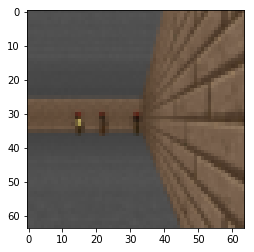

In [6]:
#Loading an image
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
data = np.load("/mnt/data/doom_data_training/obs_data_doomrnn_0.npy")
one_image = data[9][154]
plt.imshow(one_image)
#plt.plot()
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

## Measuring if there is an explosion

(-0.5, 63.5, 63.5, -0.5)

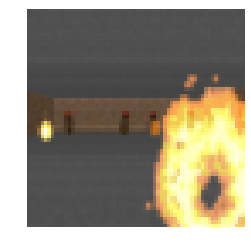

In [7]:
#data[3][208] is a good example of before/after explosion
FIREBALL_THRESHOLD = 0.65
from skimage import io, filters, color, measure
from scipy import ndimage
one_image = data[3][208]
plt.imshow(one_image)
plt.axis('off')

(-0.5, 63.5, 27.5, -0.5)

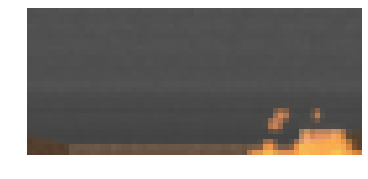

In [8]:
#First, we take off the top half of the image, because only explosions spread this high.
top_half = one_image[:28, :, :]
plt.imshow(top_half)
plt.axis('off')

(-0.5, 63.5, 27.5, -0.5)

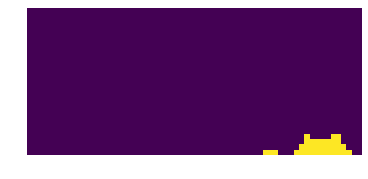

In [9]:
top_half=one_image[:28,:,:]
top_half = color.rgb2gray(top_half)
thresholded_image = ndimage.binary_fill_holes(top_half>FIREBALL_THRESHOLD)


plt.imshow(thresholded_image)
plt.axis('off')

## Measuring if there is a fireball

(-0.5, 63.5, 63.5, -0.5)

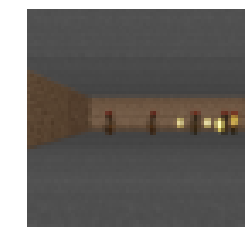

In [10]:
one_image = data[88][202]
plt.imshow(one_image)
plt.axis('off')

Number of connected objects:  4


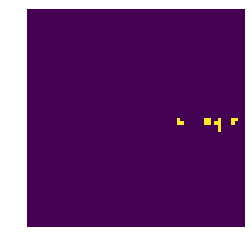

In [11]:
#Thresholding
one_image=color.rgb2gray(one_image)
thresholded_image = ndimage.binary_fill_holes(one_image>FIREBALL_THRESHOLD)


plt.imshow(thresholded_image)
plt.axis('off')

object_labels = measure.label(thresholded_image)
print("Number of connected objects: ", object_labels.max())

## Counting Monsters

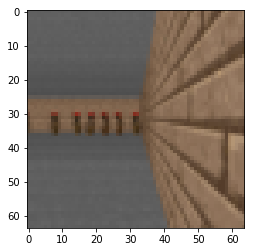

In [12]:
one_image = data[36][518]
plt.imshow(one_image)

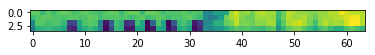

In [13]:
one_image = one_image[28:32,:,:]
one_image = one_image[:,:,1]#color.rgb2gray(one_image)
plt.imshow(one_image)

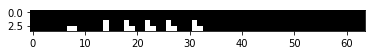

Counted monsters:  6


In [14]:
#Threshold image indicates that monsters are probably below 0.22. Testing that as a negative threshold.
neg_thresh = 0.2*256 #Found by experimentation.
binary_black = ndimage.binary_fill_holes(one_image<neg_thresh)
plt.imshow(binary_black, cmap='gray')
plt.show()
labels = measure.label(binary_black)
print("Counted monsters: ", labels.max())

## Testing if we are near a wall

0.315234375
0.4578125
left wall present?  False
right wall present?  True


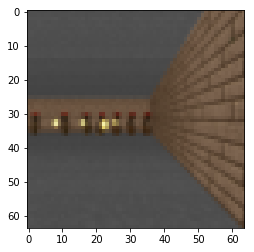

In [15]:
#Testing if there is a wall. Measured by checking average red-values in top corner of image.
#When there is a ceiling, this value is far lower than when there is a wall.
WALL_COLOR_THRESHOLD = 0.4
img = data[36][470]
img=img/256 # The way images are presented by dreams, in the interval [0,1]
#The coordinate we check to see if there is a wall. There is either a ceiling or a wall here.
pixel_row_min = 0
pixel_row_max = 10
left_pixel_col = 0
right_pixel_col = -1
color_channel = 0 #The red-channel is best at indicating a wall.

avg_left_intensity = np.average(img[pixel_row_min:pixel_row_max, left_pixel_col, color_channel])
avg_right_intensity = np.average(img[pixel_row_min:pixel_row_max, right_pixel_col, color_channel])

plt.imshow(img)
print(avg_left_intensity)
print(avg_right_intensity)
print("left wall present? ", avg_left_intensity>WALL_COLOR_THRESHOLD)
print("right wall present? ", avg_right_intensity>WALL_COLOR_THRESHOLD)
